**Netflix Content Analysis Report**


**Object.**
> Explore netflix content to provide insights into movie vs TV show, genres ,countries, ratings, duration/season, and directors


**Content**
> you are the data analyst at netflix.the content strategy team want insights about content distribution, content contributors and audience preference to guide content acquistition strategy


**Notebook structure.**
1.Mount Google Drive and load dataset
2.Inspect and clean data
3.Expolatory Data Analysis (EDA)
    -Movies vs Tv shows comparison
    -Movies analysis
    -Tv show analysis
4.Insights and Recommendation    

**1.Mount google Drive & Load Dataset**

In [2]:
 # Mount Google Drive to access the dataset

 from google.colab import drive
 import pandas as pd

 drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv("/content/drive/My Drive/Colab Notebooks/datasets/netflix_titles.csv")

df.shape

(8807, 12)

**2.Inspect & Clean Data**

In [4]:
# Check Missing Values
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [5]:
# fill missing countries

df['country']= df['country'].fillna('Unknown')

In [6]:
# fill Missing cast
df['cast']= df['cast'].fillna('No cast')

In [7]:
# Remove Missing date_added, rating & duration

df=df.dropna(subset=['date_added','rating','duration'])



In [8]:
df['date_added']=df['date_added'].str.strip()
# convert date_added to datetime
df['date_added']= pd.to_datetime(df['date_added'], format="%B %d, %Y")



In [9]:
# create year add column

df['year_added']=df['date_added'].dt.year

In [10]:
#check the finall dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      6169 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
 12  year_added    8790 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(10)
memory usage: 927.1+ KB


### **3.Expolatory Data Analysis (EDA)**
3.1 Movies vs TV show comparison
> **Business Question** How many movies vs TV show are no netflix



In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

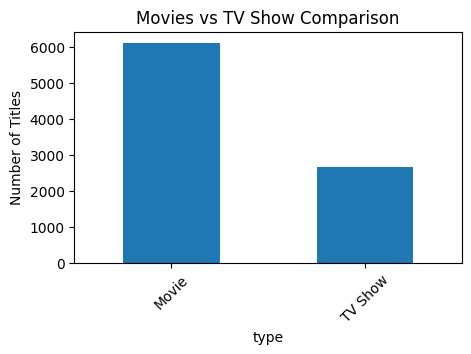

In [12]:

type_counts = df['type'].value_counts()

plt.figure(figsize=(5,3))
type_counts.plot(kind='bar')
plt.title('Movies vs TV Show Comparison')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

Here is your insight professionally styled with the specified green text and light green background.

---

<div style="background-color: #dcfce7; padding: 25px; border-radius: 8px; font-family: Arial, sans-serif; color: #14532d; line-height: 1.6;">
  <p style="margin: 0 0 15px 0; font-size: 1.1rem;">
    <strong style="color: #14532d;">##----</strong> It show simple comparsion between the number of movies and TV show
  </p>
  <p style="margin: 0 0 15px 0; font-size: 1.1rem;">
    <strong style="color: #14532d;">##----</strong> the Movies is taller than TV show
  </p>
  <p style="margin: 0; font-size: 1.1rem;">
    <strong style="color: #14532d;">##----</strong> Netflix content strategy should know that the movies dominate impacts than Tv show
  </p>
</div>         

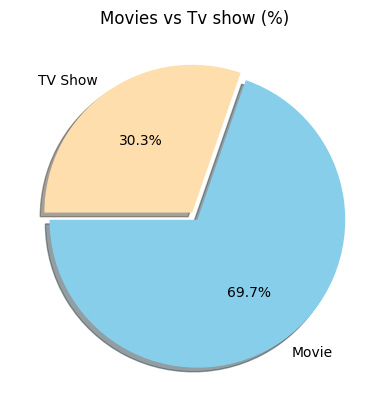

In [13]:
# Movies vs TV shows

plt.pie(
    type_counts,
    labels=type_counts.index,
    autopct= '%1.1f%%',
    colors=['skyblue','navajowhite'],
    shadow=True,
    explode=[0.03,0.03],
    startangle=180
)
plt.title('Movies vs Tv show (%)')
plt.show()

<div style="background-color: #dcfce7; padding: 25px; border-radius: 8px; font-family: Arial, sans-serif; color: #14532d; line-height: 1.6;">
  <p style="margin: 0 0 15px 0; font-size: 1.1rem;">
    <strong style="color: #14532d;">##---confirms the finding that movies comprise 69.3% of Netflix whereas TV shows make 30.7%</strong>
  </p>
  <p style="margin: 0; font-size: 1.1rem;">
    <strong style="color: #14532d;">##--- Prioritizing movies could be the most efficient approach.</strong>
  </p>
</div>


### **3.2 Movies Analysis**

**3.2.1 Movies duration**
>** Business Question:** What is the typical length of netflix movies, and this inform content planning

In [14]:
movies= df[df['type']== 'Movie'].copy()

In [15]:
movies['duration']= movies['duration'].str.replace(' min',"").astype(int)

In [16]:
movies['duration'].head()

,duration
0,90
6,91
7,125
9,104
12,127


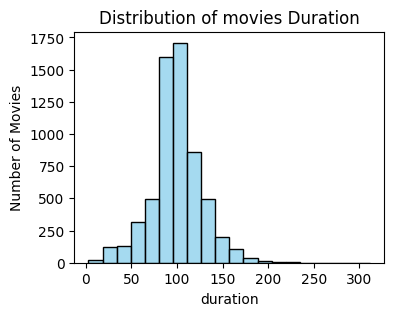

In [17]:
plt.figure(figsize=(4,3))

sns.histplot(movies['duration'], bins=20, color='skyblue')
plt.title('Distribution of movies Duration')
plt.ylabel('Number of Movies')
plt.show()

<div style="background-color:#dcfce7; padding: 20px; border-radius: 8px; font-family: Arial, sans-serif; color: #14532d;"> <p style="margin: 0 0 10px 0;"> <strong>##---</strong> number of movies and the duration in minute </p> <p style="margin: 0 0 10px 0;"> <strong>##---</strong> the movies distribution is around 90 to 120 minute range </p> <p style="margin: 0;"> <strong>##---</strong> Netflix's library movie is Mostly made of feature films </p> </div>

3.2.2 **Movies Rating**
> **Business Question:** what are the most common age rating for netflix movies, and what does this say about the target audience

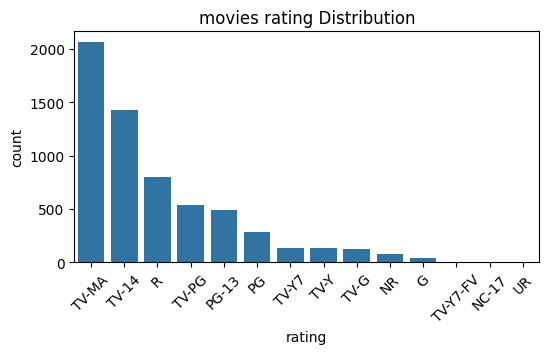

In [18]:
plt.figure(figsize=(6,3))
sns.countplot(data=movies, x='rating',order=movies['rating'] .value_counts().index)
plt.title('movies rating Distribution')
plt.xticks(rotation=45)
plt.show()

<div style="background-color: #dcfce7; padding: 25px; border-radius: 8px; font-family: Arial, sans-serif; color: #14532d; line-height: 1.6;">
  <p style="margin: 0 0 15px 0; font-size: 1.1rem;">
    <strong style="color: #14532d;">##---</strong> TV-MA (Mature Audience) is mostly rate by big gap.
  </p>
  <p style="margin: 0 0 15px 0; font-size: 1.1rem;">
    <strong style="color: #14532d;">##---</strong> this indicates that Netflix's movie content is largely adult-oriented.
  </p>
  <p style="margin: 0; font-size: 1.1rem;">
    <strong style="color: #14532d;">##---</strong> prevalence of TV-MA and TV-14 ratings is very highlights in Netflix
  </p>
</div>


###**3.2.3 Movie Games**


**Business question:**
which movies games are the the most prevalent on netflix, and where are the opportunities for the youth

In [19]:
movies['listed_in']=movies['listed_in'].str.split(',')
movies_genre=movies.explode('listed_in')
movies_genre['listed_in']=movies_genre['listed_in'].str.split() # Drama, Comedy



In [20]:
movies_genre['listed_in'].shape

(13185,)

In [21]:
# movies_genre['listed_in'].unique()
movies_genre['listed_in'].explode().unique()


array(['Documentaries', 'Children', '&', 'Family', 'Movies', 'Dramas',
       'Independent', 'International', 'Comedies', 'Thrillers',
       'Romantic', 'Music', 'Musicals', 'Horror', 'Sci-Fi', 'Fantasy',
       'Action', 'Adventure', 'Classic', 'Anime', 'Features', 'Sports',
       'Cult', 'Faith', 'Spirituality', 'LGBTQ', 'Stand-Up', 'Comedy'],
      dtype=object)

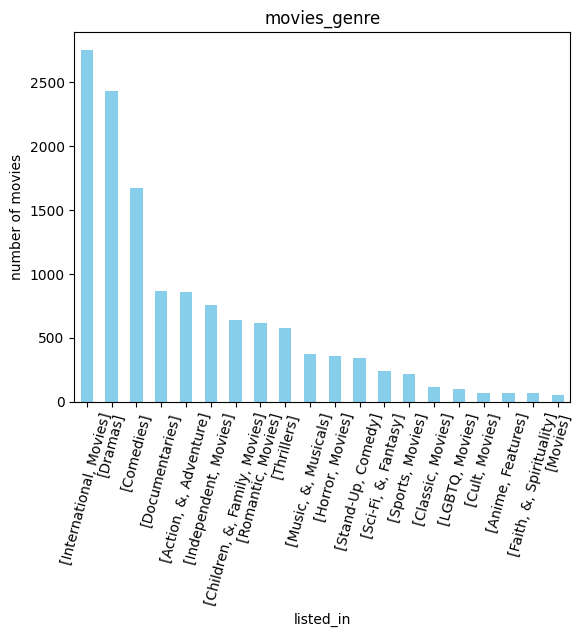

In [22]:
movies_genre['listed_in'].value_counts().plot(kind='bar', color='skyblue')
plt.title('movies_genre')
plt.ylabel('number of movies')
plt.xticks(rotation=75)
plt.show()

<div style="background-color: #dcfce7; padding: 25px; border-radius: 8px; font-family: Arial, sans-serif; color: #14532d; line-height: 1.6;">
  <p style="margin: 0 0 15px 0; font-size: 1.1rem;">
    <strong style="color: #14532d;">##---</strong> The number of movies in each listed genre.
  </p>
  <p style="margin: 0 0 15px 0; font-size: 1.1rem;">
    <strong style="color: #14532d;">##---</strong>so the total count here is higher than the number of movies.
  </p>
  <p style="margin: 0; font-size: 1.1rem;">
    <strong style="color: #14532d;">##---</strong> Dramas and Comedies is next prevalent mostly.
  </p>
</div>

##**3.2.4 Movies Directors**

**Business Question:** which director have the most movies on netflix,and who are the top contributor

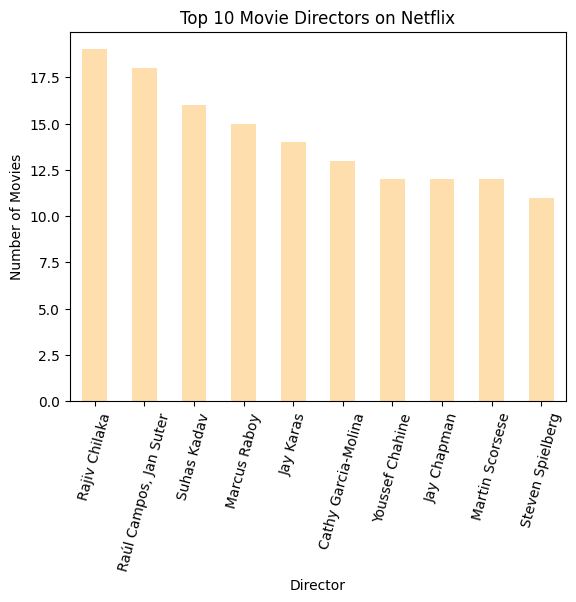

In [23]:
top_movie_directors = movies['director'].value_counts().head(10)

top_movie_directors.plot(kind='bar', color='navajowhite')
plt.title('Top 10 Movie Directors on Netflix')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=75)
plt.show()



<div style="background-color:#dcfce7; padding: 20px; border-radius: 8px; font-family: Arial, sans-serif; color: #14532d;">
  <p style="margin: 0 0 10px 0;">
    <strong>##---</strong>The top 10 directors with the most movies on Netflix.
  </p>
  <p style="margin: 0 0 10px 0;">
    <strong>##---</strong>Rajiv Chilaka is the leading contributor by a large margin
  </p>
  <p style="margin: 0 0 10px 0;">
    <strong>##---</strong>Next are Jan Suter, Raúl Campos, and others
  </p>
  <p style="margin: 0;">
    <strong>##---</strong>Identifying top contributors, such as Rajiv Chilaka, known for children's animation.
  </p>
</div>

##**3.3 Tv Show Analysis**


          

**3.3.1 TV Show Seasons**

** Business Question:** How many season do TV show typically have,and which area are the most common

In [24]:

tv_shows = df[df['type'] == 'TV Show'].copy()


In [25]:
tv_shows.shape


(2664, 13)

In [26]:

tv_shows['Seasons'] = tv_shows['duration'].str.replace(' Seasons','').str.replace(' Season','').astype(int)


In [27]:
season_count = tv_shows['Seasons'].value_counts()


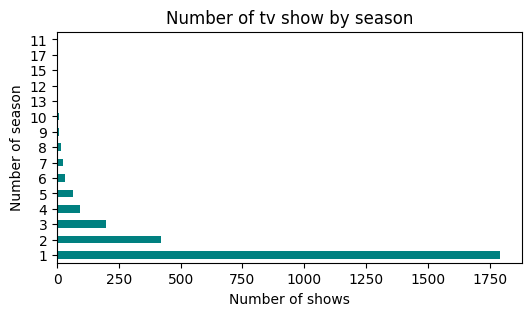

In [28]:
plt.figure(figsize=(6,3))
season_count.plot(kind='barh', color='teal')
plt.title('Number of tv show by season')
plt.ylabel('Number of season')
plt.xlabel('Number of shows')
plt.show()


<div style="background-color: #dcfce7; padding: 25px; border-radius: 8px; font-family: Arial, sans-serif; color: #14532d; line-height: 1.6;">
  <p style="margin: 0 0 15px 0; font-size: 1.1rem;">
    <strong style="color: #14532d;">##----</strong>Netflix TV shows Mostly one season with few having two or more
  </p>
  <p style="margin: 0 0 15px 0; font-size: 1.1rem;">
    <strong style="color: #14532d;">##----</strong>Netflix's TV library is dominated by limited and mini-series
  </p>
  <p style="margin: 0; font-size: 1.1rem;">
    <strong style="color: #14532d;">##----</strong>the content strategy team, this means they have many one-season shows  ----far fewer long-running series that drive sustained viewer engagement
  </p>
</div>

##**3.3.2 TV Show Ratings**

**Business Question:** what are the most common age rating for Tv Shows and does this reveal about Netflixs Audience

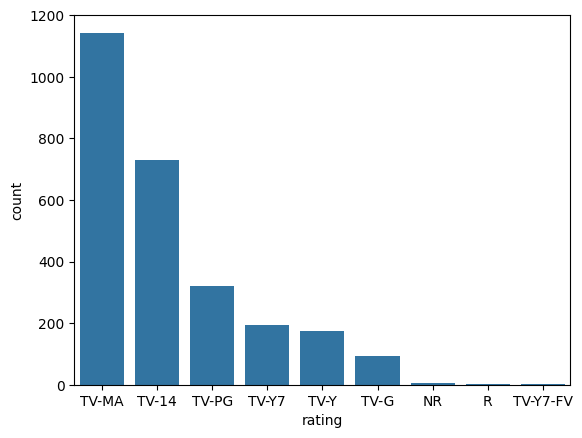

In [29]:
sns.countplot(data=tv_shows,x='rating',order=tv_shows['rating'].value_counts().index)
plt.show()

<div style="background-color: #dcfce7; padding: 25px; border-radius: 8px; font-family: Arial, sans-serif; color: #14532d; line-height: 1.6;">
  <p style="margin: 0 0 15px 0; font-size: 1.1rem;">
    <strong style="color: #14532d;">##--</strong> TV-MA (Mature Audience) is the most common rating for TV shows then TV-14
  </p>
  <p style="margin: 0; font-size: 1.1rem;">
    <strong style="color: #14532d;">##--</strong>This confirms that Netflix's TV audience, like its movie audience, is mainly adults and older teens, reinforcing its focus on mature-themed content across the platform.
  </p>
</div>

**3.3.3 Show Genre**
Business Question: which tv show genre dominate netflix,and which could be expanded

In [30]:
tv_shows['listed_in']= tv_shows['listed_in'].str.split(',')
tv_genre= tv_shows.explode('listed_in')

tv_genre['listed_in']= tv_genre['listed_in'].str.split()

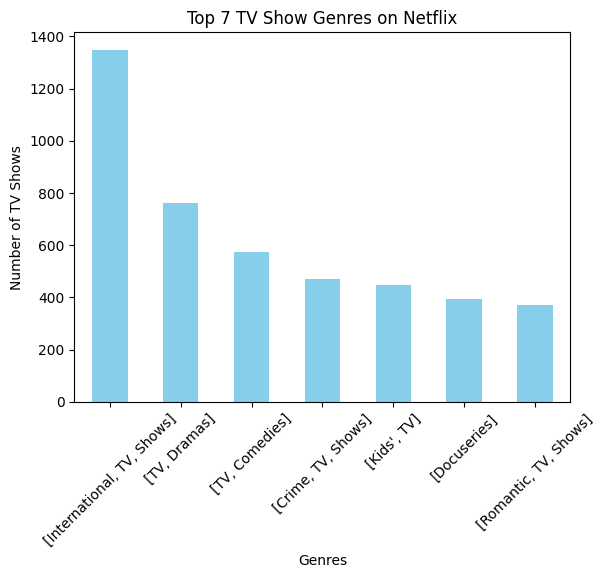

In [31]:

# Plot top 7 genres
tv_genre['listed_in'].value_counts().head(7).plot(kind='bar', color='skyblue')
plt.title('Top 7 TV Show Genres on Netflix')
plt.xlabel('Genres')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45)
plt.show()

<div style="background-color: #dcfce7; padding: 25px; border-radius: 8px; font-family: Arial, sans-serif; color: #14532d; line-height: 1.6;">
  <p style="margin: 0 0 15px 0; font-size: 1.1rem;">
    <strong style="color: #14532d;">##--</strong> International TV Shows is the most dominant genre
  </p>
  <p style="margin: 0 0 15px 0; font-size: 1.1rem;">
    <strong style="color: #14532d;">##--</strong> mirroring the movie analysis
  </p>
  <p style="margin: 0 0 15px 0; font-size: 1.1rem;">
    <strong style="color: #14532d;">##--</strong>then Kids' TV, TV Dramas, and TV Comedies.
  </p>
  <p style="margin: 0 0 15px 0; font-size: 1.1rem;">
    <strong style="color: #14532d;">##--</strong>The high placement of Kids' TV is a notable difference from the movie genre chart
  </p>
  <p style="margin: 0 0 15px 0; font-size: 1.1rem;">
    <strong style="color: #14532d;">#--</strong>Children & Family Movies was present but not the second most common
  </p>
  <p style="margin: 0; font-size: 1.1rem;">
    <strong style="color: #14532d;">##--</strong>suggests that for TV, Netflix has made a significant strategic investment in children's programming
  </p>
</div>

##**3.3.4 Show Directors**

**Business Question:** which director product the most TV shows on the Netflix, and how can this influent the content strategy

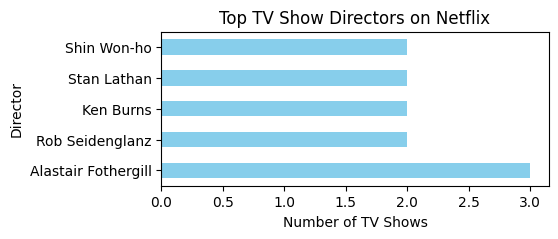

In [32]:


plt.figure(figsize=(5,2))

top_tv_directors = tv_shows['director'].value_counts().nlargest(5)

top_tv_directors.plot(kind='barh', color='skyblue')
plt.title('Top TV Show Directors on Netflix')
plt.ylabel('Director')
plt.xlabel('Number of TV Shows')
plt.show()



<div style="background-color:#dcfce7; padding: 20px; border-radius: 8px; font-family: Arial, sans-serif; color: #14532d;">
  <p style="margin: 0 0 10px 0;">
    <strong>--</strong>dominated by directors heavily involved in children's animation
  </p>
  <p style="margin: 0 0 10px 0;">
    <strong>--</strong>such as Alastair Fothergill, Tomonori Kogawa
  </p>
  <p style="margin: 0;">
    <strong>--</strong>It confirms that the large number of "Kids' TV" shows is driven by a few highly prolific directors and their studios.
  </p>
</div>